# Part 3 - Datasets

## What you'll learn:

- What are datasets and assets in PySyft
- Working with datasets and assets: create, upload, data access control
- How to write a dataset description

## Intro: Datasets and Assets

Datasets in PySyft empower researchers to conduct studies in a **remote manner**, on private data that otherwise would not be accessible to them. The whole dataset (namely, **data, access to it and the result computed from it**) is fully guarded, managed and mentained by the data owner.

Datasets are hosted on a PySyft server. In Level 0 and Level 1, the mock and private datasets are hosted on separate machine, whereas from Level 2 onwards, they are hosted on the same machine.

Datasets (`sy.Dataset`) are Syft objects which hold data assets. Assets (`sy.Asset`) are Syft objects which directly hold the data you want to upload and work with. 

<div class="admonition alert alert-info">
    <p class="admonition-title" style="font-weight:bold">Info</p>
    A `<code>Syft Dataset</code> can contain one or more <code>Syft Assets</code>. An asset must belong to a dataset, and cannot be uploaded on its own. Throughout the documentation, dataset refers to <code>Syft Dataset</code>, and asset refers to <code>Syft Asset</code>.
</div>    

Below are a few examples of how one can organise their assets within a dataset:

**Example 1**:\
The dataset is composed of two assets, one with testing data, and another asset with training data. These two can be uploaded together into the same dataset.

**Example 2**:\
The dataset is composed of multiple assets collected differently, for example *data-july-14.csv*, *data-july-17.csv*, and *data-august-12.csv*. All these three assets can be uploaded into the same dataset.

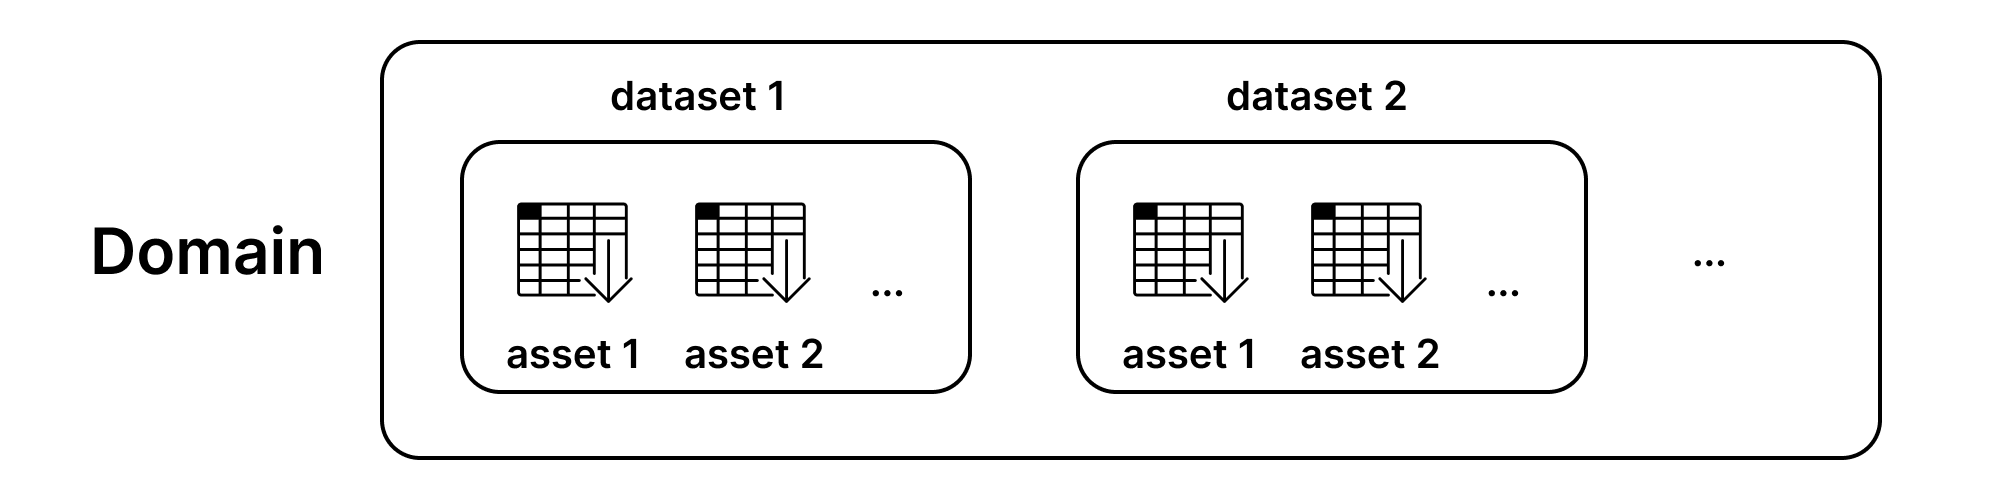

An asset (`sy.Asset`) serves three main functions: 
- **contains the data**:
    - In Level 2+, the same object holds both the mock and private data
    - In Level <2, it holds only the data that applies to each domain, i.e. low-side holds mock data, high-side holds private
- **manages access control** to the data: this is easily noticeable in Level 2+, where the assets implement role-based access control, meaning that only admins can access private, and guests (data scientist roles) can only access the mock
- **pointer for remote code execution requests**: uniquely identify the assets required for the request, particularly useful in Level 2 and above.

To show how datasets and assets can be created and further uploaded, we will launch now a test domain for our purpose and login into it using default credentials.

### Preparing a test domain

In [1]:
import pandas as pd
import syft as sy

kj/filesystem-disk-unix.c++:1703: warning: PWD environment variable doesn't match current directory; pwd = /Users/carmenpopa/.hagrid/quickstart


In [2]:
# launching a test node
node = sy.orchestra.launch(name="test_domain", port=8080, dev_mode=False, reset=True)

# logging in with default credentials (just for the example)
domain = sy.login(email="info@openmined.org", password="changethis", port=8080)

Starting test_domain server on 0.0.0.0:8080


kj/filesystem-disk-unix.c++:1703: warning: PWD environment variable doesn't match current directory; pwd = /Users/carmenpopa/.hagrid/quickstart


Waiting for server to start. Done.
Logged into <test_domain: High side Domain> as <info@openmined.org>


SyftWarning: You are using a default password. Please change the password using `[your_client].me.set_password([new_password])`.

## Working with datasets and assets: creation

Let's walk together through the creation of a dataset and asset using the [Age Dataset 2023](https://www.kaggle.com/datasets/lasaljaywardena/age-dataset-2023), which was introduced in the [tutorial on generating mock data]().

In [3]:
import pandas as pd
import syft as sy
import gdown

url = "https://drive.google.com/u/1/uc?id=1TGxZ8wVAR0beTcKkKw5pQm2rbjEx-VBX&export=download"
gdown.download(url=url, output="ages_dataset.csv", quiet=True)

age_df = pd.read_csv("ages_dataset.csv")
age_df = age_df.dropna(how="any")
age_df.head()

,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death,Associated Countries,Associated Country Coordinates (Lat/Lon),Associated Country Life Expectancy
0,Q23,George Washington,1st president of the United States (1732–1799),Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799.0,natural causes,67.0,"['United Kingdom', 'United States']","[(55.378051, -3.435973), (37.09024, -95.712891)]","[81.3, 78.5]"
1,Q42,Douglas Adams,English writer and humorist,Male,United Kingdom,Artist,1952,2001.0,natural causes,49.0,['United Kingdom'],"[(55.378051, -3.435973)]",[81.3]
2,Q91,Abraham Lincoln,16th president of the United States (1809-1865),Male,United States of America,Politician,1809,1865.0,homicide,56.0,['United States'],"[(37.09024, -95.712891)]",[78.5]
5,Q260,Jean-François Champollion,French classical scholar,Male,Kingdom of France; First French Empire,Egyptologist,1790,1832.0,natural causes,42.0,['France'],"[(46.227638, 2.213749)]",[82.5]
7,Q296,Claude Monet,French impressionist painter (1840-1926),Male,France,Artist,1840,1926.0,natural causes,86.0,['France'],"[(46.227638, 2.213749)]",[82.5]


Let's download the mock file we have just generated from the previous tutorial.

In [4]:
url = "https://drive.google.com/u/1/uc?id=14Vh408-ad9hF2mA9LNKNx3H4pF2MAhfb&export=download"
gdown.download(url=url, output="ages_mock_dataset.csv", quiet=True)

age_mock_df = pd.read_csv("ages_mock_dataset.csv")
age_mock_df = age_mock_df.dropna(how="any")
age_mock_df.head()

,Id,Gender,Age of death,Associated Countries,Associated Country Life Expectancy,Name,Short description,Occupation,Death year,Birth year
0,Q6658,Gender 1,59.0,['Italy'],[82.9],Norma Fisher,Magazine truth stop whose group through despite.,Corporate treasurer,1989.0,1930
1,Q4919,Gender 1,86.0,['United States'],[78.5],Brandon Lloyd,Total financial role together range line beyon...,Chief Financial Officer,2018.0,1932
2,Q2095,Gender 1,45.0,['United States'],[78.5],Michelle Glover,Partner stock four. Region as true develop sou...,Speech and language therapist,2000.0,1955
3,Q11451,Gender 1,80.0,['Turkey'],[77.4],Willie Golden,Feeling fact by four. Data son natural explain...,Financial controller,1989.0,1909
4,Q8797,Gender 1,74.0,['United Kingdom'],[81.3],Roberto Johnson,Attorney quickly candidate change although bag...,"Sound technician, broadcasting/film/video",2016.0,1942


### Creating a sy.Asset

To create an asset (sy.Asset), the available parameters are:
- `name (type: string)`: name of the asset, acts as a key among the assets in the same dataset and it must be unique
- `data (type: Pandas DataFrame)`: contains the private data; if you are preparing the assets for the low-side domain (as in Level 0), this can also use the mock data.
- `mock (type: Pandas Dataframe)`: contains the fake data; this data should have the same schema as the private data, but does not contain any sensitive information; (*note: more on how to generate such a mock data can be found [here]()*)
<div class="admonition alert alert-info">
    <p class="admonition-title" style="font-weight:bold">Info</p>
    If you are uploading data to the high-side and there is no mock available or it is not considered necessary, you can pass <code>mock=sy.ActionObject.empty()</code> to signal this.
</div>    

In [5]:
# How an asset for low side and high-side would be defined:

low_side_asset = sy.Asset(
    name="asset_name",
    data=age_df, # real dataframe
    mock=age_mock_df, # mock dataframe
)

high_side_asset = sy.Asset(
    name="Age Data 2023",
    data=age_df,
    mock=sy.ActionObject.empty()
)

### Creating a sy.Dataset


To create a dataset (sy.Dataset), the available parameters are:
- `name (type: string)`: name of the dataset, acts as a key among datasets and it must be unique
- `asset_list (type: [Py.Assets])`: a list of assets which contain the actual data uploaded as part of the dataset
- (optional) `description (type: string)`: brief additional information about the data found in the dataset, supports markdown
- (optional) `citation (type: string)`: indications on how to cite the dataset if used
- (optional) `url (type: string)`: link related to the dataset
- (optional) `contributors_list (type: [Contributor])`: contributors to the dataset


In [6]:
# Example creating the dataset for a low-side domain

low_side_dataset = sy.Dataset(
    name="Dataset name",
    description="**Dataset description**",
    asset_list=[low_side_asset]
)


high_side_dataset = sy.Dataset(
    name="Dataset name",
    description="**Dataset description**",
    asset_list=[high_side_asset]
)

### Rule of thumb 1: asset name matching

Asset name matching is an important concept in PySyft - which is what we can see above.

As data scientists test their code using the mock data on the low side domain, they might submit their code to be run on the real data. As a data owner, you will be responsible to run the code on the high-side on the correct dataset and asset as request. 

To achieve this, please ensure that the **names of the datasets and assets must match between the low and the high side domain**.

### Rule of thumb 2: describing your dataset

Descriptions are important attributes for datasets, as they are the key for helping the data scientist understand the data, despite not having access to it. Thus, a well-wrritten comprehensive description can help answer questions and clarify assumptions that the data scientist might have about the data.

We propose the following template on what to cover in a dataset description:
- **About the dataset**: short description mentioning what type of data (numerical, text, image, mixed) and realted to what domain; 
- **Dataset usage policy**: describe the data usage policies the researchers must adhere to in their study to have their requests approved
- **Use cases**: what use cases this dataset has been proposed for
- **Data collection and pre-processing**: information on how the features were collected and/or derived, and how accurate the data is
- **Key features (schema)**: a data dictionary, explaining all the columns presented in the dataset. Additionally, we recommend mentioning if there is are relationships between the columns
- **Code snippets**: these can be included for common operations, for example one can include how to load the dataset to get started with it
- **Execution environment**: information about the hardware machine on which the data is hosted
- **Citations**: how to cite the dataset


**Markdown**

The dataset description supports markdown to offer more structure and clarity in the text. As such, you can write the description directly in a markdown editor ([Editor.md](https://pandao.github.io/editor.md/en.html), [Markdown Live Preview](https://markdownlivepreview.com/)), edit and preview it until it's good to go, and in the end just copying the final markdown in the description field when creating a dataset.

We provide a markdown template below for a comprehensive description.

**Template**

Let's write an example description for the age dataset used in this tutorial. This will be used below, in the section about creating datasets.


In [7]:
description_template = '''### About the dataset
This extensive dataset provides a rich collection of demographic and life events records for individuals across multiple countries. It covers a wide range of indicators and attributes related to personal information, birth and death events, gender, occupation, and associated countries. The dataset offers valuable insights into population dynamics and various aspects of human life, enabling comprehensive analyses and cross-country comparisons. The dataset is the largest one on notable deceased people and includes individ- uals from a variety of social groups, including but not limited to 107k females, 90k researchers, and 124 non-binary indi- viduals, spread across more than 300 contemporary or histor- ical regions.

### Dataset usage policy
This dataset is subject to compliance with internal data use and mis-use policies at our organisation. The following rules apply:
- only aggregate statistics can be released from data computation
- data subjects should never be identifiable through the data computation outcomes
- a fixed privacy budget of eps=5 must be preserved by each researcher

### Data collection and pre-processing
The dataset is based on open data hosted by Wikimedia Foundation.

**Age**
Whenever possible, age was calculated based on the birth and death year mentioned in the description of the individual.

**Gender**
Gender was available in the original dataset for 50% of participants. For the remaining, it was added from predictions based on name, country and century in which they lived. (97.51% accuracy and 98.89% F1-score)

**Occupation**
The occupation was available in the original dataset for 66% of the individuals. For the remaining, it was added from predictions from a multiclass text classificator model. (93.4% accuracy for 84% of the dataset)

More details about the features can be found by reading the paper.

### Key features
1. **Id**: Unique identifier for each individual.
2. **Name**: Name of the person.
3. **Short description**: Brief description or summary of the individual.
4. **Gender**: Gender/s of the individual.
5. **Country**: Countries/Kingdoms of residence and/or origin.
6. **Occupation**: Occupation or profession of the individual.
7. **Birth year**: Year of birth for the individual.
8. **Death year**: Year of death for the individual.
9. **Manner of death**: Details about the circumstances or manner of death.
10. **Age of death**: Age at the time of death for the individual.
11. **Associated Countries**: Modern Day Countries associated with the individual.
12. **Associated Country Coordinates (Lat/Lon)**: Modern Day Latitude and longitude coordinates of the associated countries.
13. **Associated Country Life Expectancy**: Life expectancy of the associated countries.

### Use cases
- Analyze demographic trends and birth rates in different countries.
- Investigate factors affecting life expectancy and mortality rates.
- Study the relationship between gender and occupation across regions.
- Explore correlations between age of death and associated country attributes.
- Examine patterns of migration and associated countries' life expectancy.


### Getting started

```
import gdown

url = "https://drive.google.com/u/1/uc?id=1TGxZ8wVAR0beTcKkKw5pQm2rbjEx-VBX&export=download"
gdown.download(url=url, output="ages_dataset.csv", quiet=False)
age_df = pd.read_csv("ages_dataset.csv")
```

### Execution environment
The data is hosted in a remote compute environment with the following specifications:
- X CPU cores
- 1 GPU of type Y
- Z RAM
- A additional available storage

### Citation
Annamoradnejad, Issa; Annamoradnejad, Rahimberdi (2022), “Age dataset: A structured general-purpose dataset on life, work, and death of 1.22 million distinguished people”, In Workshop Proceedings of the 16th International AAAI Conference on Web and Social Media (ICWSM), doi: 10.36190/2022.82
'''

In [8]:
# Complete example: creating a dataset with one asset

low_side_dataset = sy.Dataset(
    name="Dataset name",
    description=description_template,
    asset_list=[
        sy.Asset(
            name="Age Data 2023",
            data=age_df,
            mock=age_df # TODO!!!! modify to mock
    )]
)

## Working with datasets and assets: uploading

To upload a dataset on a domain, use the `upload_dataset` function. You need to be logged in into the domain (low side or high side).
<div class="admonition alert alert-info">
    <p class="admonition-title" style="font-weight:bold">Info</p>
Assets can be only uploading as part of a dataset.
</div>    


In [9]:
# Uploading the dataset
domain.upload_dataset(low_side_dataset)

  0%|                                                     | 0/1 [00:00<?, ?it/s]

Uploading: Age Data 2023


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.40it/s]


SyftSuccess: Dataset uploaded to 'test_domain'. To see the datasets uploaded by a client on this node, use command `[your_client].datasets`

In [10]:
age_mock_df.shape

(10000, 10)

In [11]:
age_df.shape

(44211, 13)

In [12]:
age_mock_df['Country'] = 'NA'
age_mock_df['Associated Country Coordinates (Lat/Lon)'] = 'NA'
age_mock_df['Manner of death'] = 'NA'

In [13]:
set(age_df.columns) - set(age_mock_df.columns)

set()

In [14]:
!syft --v

usage: syft [-h] [--name NAME] [--node-type NODE_TYPE] [--host HOST]
            [--port PORT] [--dev-mode DEV_MODE] [--reset RESET]
            [--local-db LOCAL_DB] [--processes PROCESSES] [--tail TAIL]
            [--cmd CMD]
            command
syft: error: the following arguments are required: command


## Working with datasets and assets: access

**Access control**

PySyft has built-in access control. There are two roles available, namely `ADMIN` and `GUEST`, and the next tutorial will explain how the admin can manage those. The owner of the domain has the role of admin, and anyone else who has an account (for example, data scientists) have the role of guest.

All registered users on a domain can discover the datasets available, so the data owner must be careful to not host private assets in a low-side domain. The datasets are discoverable upon login as follows:

In [15]:
# returns a list of all the available datasets for that domain (or empty list if none)
domain.datasets

In [16]:
# access a particular dataset by its index, or by its unique key (name)
domain.datasets[0] # or domain.datasets["Dataset name"]

syft.service.dataset.dataset.Dataset

In [17]:
# returns a list of all the available assets for the specific dataset
domain.datasets[0].assets

TupleDict([('Age Data 2023', syft.service.dataset.dataset.Asset)])

In [18]:
# access a particular asset by its index, or by its unique key (name)
domain.datasets[0].assets[0] # or domain.datasets[0].assets["Age Data 2023"]

syft.service.dataset.dataset.Asset

While everyone can discover datasets, it's good to note that the guest role is much more limited. A particular aspect is that they are not allowed to access the parts of the API that could contain real data (`asset.data`). 

<div class="admonition alert alert-info">
    <p class="admonition-title" style="font-weight:bold">Info</p>
In a low-high side deployment, as in Level 0 and Level 1, this type of access control is less relevant since the datasets are already hosted in separate machines. However, the data scientist experience is the same regardless of the type of deploymnet the data owner opted for, thus, even if there is no private data uploaded as part of a low-side asset, they would still not have access to the <code>asset.data</code> counterpart of it, but only to the <code>asset.mock</code>.
</div>    


In [19]:
# Access the mock or the real data within an asset
dataset = domain.datasets[0]

mock_data = dataset.assets[0].mock # or dataset.assets[0].data, for the real data

In [20]:
# access the markdown description of the dataset
domain.datasets[0].description

### About the dataset
This extensive dataset provides a rich collection of demographic and life events records for individuals across multiple countries. It covers a wide range of indicators and attributes related to personal information, birth and death events, gender, occupation, and associated countries. The dataset offers valuable insights into population dynamics and various aspects of human life, enabling comprehensive analyses and cross-country comparisons. The dataset is the largest one on notable deceased people and includes individ- uals from a variety of social groups, including but not limited to 107k females, 90k researchers, and 124 non-binary indi- viduals, spread across more than 300 contemporary or histor- ical regions.

### Dataset usage policy
This dataset is subject to compliance with internal data use and mis-use policies at our organisation. The following rules apply:
- only aggregate statistics can be released from data computation
- data subjects should never be identifiable through the data computation outcomes
- a fixed privacy budget of eps=5 must be preserved by each researcher

### Data collection and pre-processing
The dataset is based on open data hosted by Wikimedia Foundation.

**Age**
Whenever possible, age was calculated based on the birth and death year mentioned in the description of the individual.

**Gender**
Gender was available in the original dataset for 50% of participants. For the remaining, it was added from predictions based on name, country and century in which they lived. (97.51% accuracy and 98.89% F1-score)

**Occupation**
The occupation was available in the original dataset for 66% of the individuals. For the remaining, it was added from predictions from a multiclass text classificator model. (93.4% accuracy for 84% of the dataset)

More details about the features can be found by reading the paper.

### Key features
1. **Id**: Unique identifier for each individual.
2. **Name**: Name of the person.
3. **Short description**: Brief description or summary of the individual.
4. **Gender**: Gender/s of the individual.
5. **Country**: Countries/Kingdoms of residence and/or origin.
6. **Occupation**: Occupation or profession of the individual.
7. **Birth year**: Year of birth for the individual.
8. **Death year**: Year of death for the individual.
9. **Manner of death**: Details about the circumstances or manner of death.
10. **Age of death**: Age at the time of death for the individual.
11. **Associated Countries**: Modern Day Countries associated with the individual.
12. **Associated Country Coordinates (Lat/Lon)**: Modern Day Latitude and longitude coordinates of the associated countries.
13. **Associated Country Life Expectancy**: Life expectancy of the associated countries.

### Use cases
- Analyze demographic trends and birth rates in different countries.
- Investigate factors affecting life expectancy and mortality rates.
- Study the relationship between gender and occupation across regions.
- Explore correlations between age of death and associated country attributes.
- Examine patterns of migration and associated countries' life expectancy.


### Getting started

```
import gdown

url = "https://drive.google.com/u/1/uc?id=1TGxZ8wVAR0beTcKkKw5pQm2rbjEx-VBX&export=download"
gdown.download(url=url, output="ages_dataset.csv", quiet=False)
age_df = pd.read_csv("ages_dataset.csv")
```

### Execution environment
The data is hosted in a remote compute environment with the following specifications:
- X CPU cores
- 1 GPU of type Y
- Z RAM
- A additional available storage

### Citation
Annamoradnejad, Issa; Annamoradnejad, Rahimberdi (2022), “Age dataset: A structured general-purpose dataset on life, work, and death of 1.22 million distinguished people”, In Workshop Proceedings of the 16th International AAAI Conference on Web and Social Media (ICWSM), doi: 10.36190/2022.82


## [Optional] Model cards

Oftentimes, you might not work only with a private dataset, but also with a private model. 

The same principles and way of working as described in this tutorial apply for already-trained models as well. In case you are deploying a private model, it is useful to include a **model card** in the markdown description template. This will give the guest user (data scientist) more insights and information about the model, such as the usecases and limitations, biases, the dataset it was trained on, the parameters in use, as well as the evaluation results. 

You can read more about model cards [here](https://huggingface.co/docs/hub/model-cards).

## Summary
* Datasets and assets are the main mechanism to store data on a PySyft Server
* Datasets can contain multiple assets and must be well-documented
* Assets are a dual object: containing both mock and the actual data, so one must be careful when uploading their data into low-side and high-side respectively
* To easily match datasets and assets between low-side and high-side, one should use consistent namings. 

### What's Next?
In the next notebook, we will look more into how an admin can manage the users on the platform.